#                                   Laboratorio 1 

### Librerias a usar

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random

In [2]:
data = pd.read_csv("Admission_Predict.csv") 
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
gre = data.iloc[:len(data), 1].values
toefl = data.iloc[:len(data), 2].values
universityR = data.iloc[:len(data), 3].values
sop = data.iloc[:len(data), 4].values
lor = data.iloc[:len(data), 5].values
cgpa = data.iloc[:len(data), 6].values
admit = data.iloc[:len(data), 8].values

## LOR vs Admit 

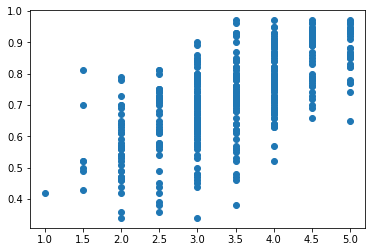

In [4]:
plt.scatter(lor,admit)

## University Rating vs Admit 

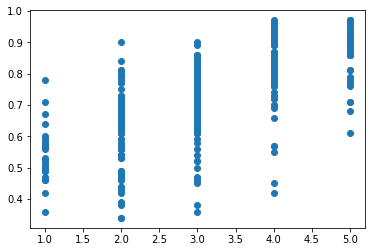

In [5]:
plt.scatter(universityR,admit)

## SOP vs Admit 

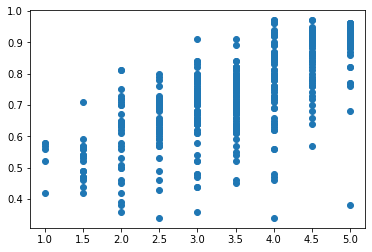

In [6]:
plt.scatter(sop,admit)

## GRE Score vs Admit 

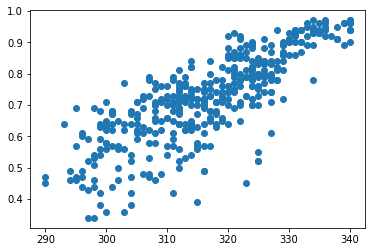

In [7]:
plt.scatter(gre,admit)

## CGPA vs Admit 

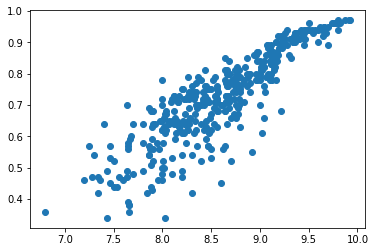

In [8]:
plt.scatter(cgpa,admit)

## Toefl vs Admit 

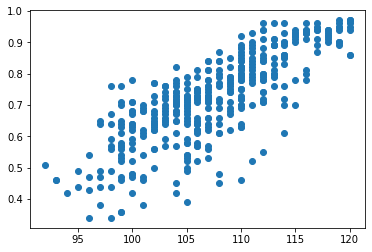

In [9]:
plt.scatter(toefl,admit)

Como se puede observar en los diagramas de dispersiòn solo hay 3 variables que tienen relacion con la variable de Admit. Estas son Gre Score, TOEFL Score y CGPA, por lo que seràn seleccionadas para hacer la transformacion de datos. 

In [10]:
datos =  pd.read_csv("Admission_Predict.csv", usecols=['GRE Score','TOEFL Score', 'CGPA', 'Chance of Admit ']) 
dataI = datos.iloc[:len(data), 0:4].values

# Funciones

## Descenso del gradiente

In [11]:
def gradient_descent(
        X,
        y,
        theta_0,
        cost,
        cost_derivate,
        alpha=0.01,
        treshold=0.0001,
        max_iter=100000):
    theta, i = theta_0, 0
    costs = []
    gradient_norms = []
    while np.linalg.norm(cost_derivate(X, y, theta)) > treshold and i < max_iter:
        theta -= alpha * cost_derivate(X, y, theta)
        i += 1
        costs.append(cost(X, y, theta))
        gradient_norms.append(cost_derivate(X, y, theta))
    return theta, costs, gradient_norms

## Costo Lineal

In [12]:
def linear_cost(X, y, theta):
    m, _ = X.shape
    h = np.matmul(X, theta)
    sq = (y - h) ** 2
    return sq.sum() / (2 * m)

## Derivada del Costo Lineal

In [13]:
def linear_cost_derivate(X, y, theta):
    h = np.matmul(X, theta)
    m, _ = X.shape
    return np.matmul((h - y).T, X).T / m

## Seleccion de datos

Los datos se dividiran 60% para train, 20% para test y 20% para crossvalidation

In [14]:
trainingN = 0.6
cvN = 0.2
random.shuffle(dataI)
a = int(len(dataI)*trainingN)
b = int(len(dataI)*cvN)

training = dataI[:a]
cv = dataI[a:a+b]
test = dataI[a+b:]

training_y = training[:len(data), -1].reshape(-1,1)
test_y = test[:len(data), -1].reshape(-1,1)

### Primero se usara como X la variable de GRE Score

In [38]:
x = (training[:,:1].reshape(len(training[:,:1]),))
Y = training[:,3:4]

In [39]:
X = np.vstack(
    (
        np.ones(x.size),
        x,
        (x **2)/100
    )
).T
dataset_2 = (X, Y)

THETA: [[ 0.00893016]
 [-0.0064289 ]
 [ 0.00271189]]


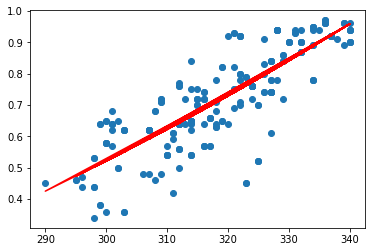

In [36]:
(X, y) = dataset_2
m, n = X.shape

theta_0 = np.random.rand(n, 1)
theta, costs, gradient_norms = gradient_descent(
    X,
    y,
    theta_0,
    linear_cost,
    linear_cost_derivate,
    alpha=0.000001,
    treshold=0.001,
    max_iter=100000
)

print ('THETA:', theta)

# Plot training data
plt.scatter(X[:, 1], y)

plt.plot(X[:, 1], np.matmul(X, theta), color='red')

# plt.plot(np.arange(len(costs)), costs)

plt.show()


### Se usarà como X la variable de TOEFL Score

In [18]:
x = (training[:,1:2].reshape(len(training[:,1:2]),))
Y = training[:,3:4]

In [19]:
X = np.vstack(
    (
        np.ones(x.size),
        x,
        (x **2)/100
    )
).T
dataset_2 = (X, Y)

THETA: [[ 0.62766545]
 [-0.01975642]
 [ 0.01896482]]


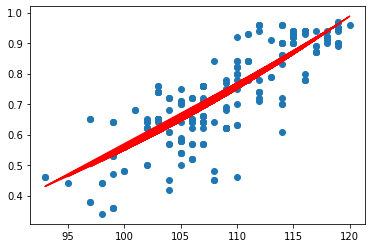

In [20]:
(X, y) = dataset_2
m, n = X.shape

theta_0 = np.random.rand(n, 1)
theta, costs, gradient_norms = gradient_descent(
    X,
    y,
    theta_0,
    linear_cost,
    linear_cost_derivate,
    alpha=0.000001,
    treshold=0.001,
    max_iter=1000000
)

print ('THETA:', theta)

# Plot training data

plt.scatter(X[:, 1], y)

plt.plot(X[:, 1], np.matmul(X, theta), color='red')

# plt.plot(np.arange(len(costs)), costs)

plt.show()


### Se usarà como X la variable de CGPA

In [21]:
x = (training[:,2:3].reshape(len(training[:,2:3]),))
Y = training[:,3:4]

In [22]:
X = np.vstack(
    (
        np.ones(x.size),
        x,
        (x **2)/100
    )
).T
dataset_2 = (X, Y)

THETA: [[0.06863986]
 [0.01412575]
 [0.72176591]]


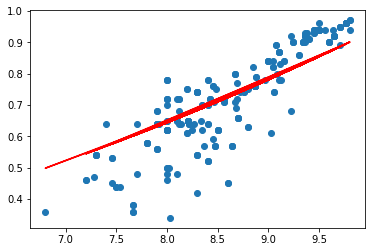

In [23]:
(X, y) = dataset_2
m, n = X.shape

theta_0 = np.random.rand(n, 1)
theta, costs, gradient_norms = gradient_descent(
    X,
    y,
    theta_0,
    linear_cost,
    linear_cost_derivate,
    alpha=0.000001,
    treshold=0.001,
    max_iter=100000
)

print ('THETA:', theta)

# Plot training data

plt.scatter(X[:, 1], y)

plt.plot(X[:, 1], np.matmul(X, theta), color='red')

# plt.plot(np.arange(len(costs)), costs)

plt.show()


# Funciones regularizadas

## Descenso del gradiente regularizado

In [24]:
def gradient_descent_grad(
        X,
        y,
        theta_0,
        cost,
        cost_derivate,
        alpha=0.01,
        treshold=0.0001,
        lam=1,
        max_iter=10000):
    theta, i = theta_0, 0
    costs = []
    gradient_norms = []
    while np.linalg.norm(cost_derivate(X, y, theta, lam)) > treshold and i < max_iter:
        theta -= alpha * cost_derivate(X, y, theta, lam)
        i += 1
        costs.append(cost(X, y, theta,lam))
        gradient_norms.append(cost_derivate(X, y, theta, lam))
    return theta, costs, gradient_norms

## Costo Lineal Regularizado

In [25]:
def linear_cost_grad(X, y, theta, lam):
    m, _ = X.shape
    h = np.matmul(X, theta)
    sq = (y - h) ** 2
    return sq.sum() + (lam*(theta**2)).sum()/ (2 * m)

## Derivada de Costo Lineal Regularizado

In [26]:
def linear_cost_derivate_grad(X, y, theta, lam):
    h = np.matmul(X, theta)
    m, _ = X.shape
    return np.matmul((h - y).T, X).T + (lam*theta).sum()/ m

### Regresion Lineal Regularizado con GRE Score

THETA: [[ 0.51945268]
 [-0.00889155]
 [ 0.0029826 ]]


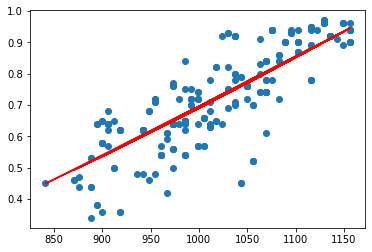

In [40]:
(X, y) = dataset_2
m, n = X.shape

theta_0 = np.random.rand(n, 1)
theta, costs, gradient_norms = gradient_descent_grad(
    X,
    y,
    theta_0,
    linear_cost_grad,
    linear_cost_derivate_grad,
    alpha=0.000000001,
    treshold=0.001,
    lam=15,
    max_iter=200000
)

print ('THETA:', theta)

# Plot training data
plt.scatter(X[:, 2], y)

plt.plot(X[:, 2], np.matmul(X, theta), color='red')

# plt.plot(np.arange(len(costs)), costs)

plt.show()


# Test Gre Score

Para esta seccion se usaran los datos que quedaron en el test, para probar que el entrenamiento fue efectivo o no. Con una variable Theta previamente sacada es que se hara el test

In [41]:
print ('THETA:', theta)

THETA: [[ 0.51945268]
 [-0.00889155]
 [ 0.0029826 ]]


In [46]:
x = (test[:,:1].reshape(len(test[:,:1]),))
test_y = test[:len(data), -1].reshape(-1,1)

In [47]:
X = np.vstack(
    (
        np.ones(x.size),
        x,
        (x **2)/100
    )
).T
dataset_2 = (X, Y)

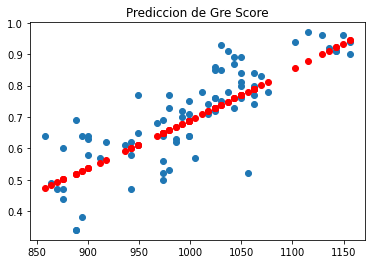

In [51]:
plt.scatter(X[:, 2], test_y)
plt.scatter(X[:, 2], np.matmul(X, theta), color='red')
plt.title("Prediccion de Gre Score")
plt.show()

El modelo se puede sigue teniendo una forma muy lineal por lo que se puede concluir que tiene un Problema de BIas ya que quedo muy pobre para lo que se esperaba. Se recomienda hacerle mas transformaciones para poder ajustarlo mas a una prediccion con menos errores.